# IPL Bowling Performance Analysis
## Comprehensive Analysis of Most Runs Conceded Per Innings (All Seasons)

This notebook analyzes IPL bowling performances focusing on:
- Bowler economy and wicket-taking ability
- Venue-wise performance patterns
- Team-wise analysis
- Historical trends and insights

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## Load and Explore the Dataset

In [2]:
# Load the bowling data
df = pd.read_csv('Most Runs Conceded Per Innings All Seasons Combine.csv', index_col=0)

# Display basic information
print("Dataset Shape:", df.shape)
print("\nColumn Names and Data Types:")
print(df.dtypes)
print("\n" + "="*80)
print("First 10 rows:")
display(df.head(10))

print("\n" + "="*80)
print("Dataset Statistics:")
display(df.describe())

print("\n" + "="*80)
print("Unique Values:")
print(f"Total Players: {df['Player'].nunique()}")
print(f"Total Venues: {df['Venue'].nunique()}")
print(f"Total Teams (Against): {df['Against'].nunique()}")
print(f"Date Range: {df['Match Date'].min()} to {df['Match Date'].max()}")

Dataset Shape: (2100, 8)

Column Names and Data Types:
Player         object
Ov            float64
Runs            int64
Wkts            int64
SR            float64
Against        object
Venue          object
Match Date     object
dtype: object

First 10 rows:


,Player,Ov,Runs,Wkts,SR,Against,Venue,Match Date
0,RP Singh,4.0,59,1,24.0,KKR,Rajiv Gandhi Intl. Cricket Stadium,11 May 2008
1,Palani Amarnath,4.0,57,1,24.0,MI,Chidambaram,23 April 2008
2,Vikram Singh,4.0,56,0,0.0,MI,Wankhede Stadium,21 May 2008
3,Munaf Patel,4.0,55,0,0.0,DEC,Rajiv Gandhi Intl. Cricket Stadium,24 April 2008
4,Munaf Patel,4.0,55,1,24.0,CSK,Chidambaram,24 May 2008
5,Jacob Oram,4.0,53,0,0.0,MI,Chidambaram,23 April 2008
6,James Hopes,4.0,53,1,24.0,CSK,IS Bindra Stadium,19 April 2008
7,Mohammad Asif,4.0,51,0,0.0,DEC,Arun Jaitley Stadium,15 May 2008
8,Pradeep Sangwan,3.0,51,0,0.0,RCB,M. Chinnaswamy Stadium,19 May 2008
9,RP Singh,4.0,50,0,0.0,DC,Arun Jaitley Stadium,15 May 2008



Dataset Statistics:


,Ov,Runs,Wkts,SR
count,2100.000000,2100.000000,2100.000000,2100.000000
mean,3.827238,40.700000,0.828095,10.976348
std,0.401119,5.906247,0.871698,10.523346
min,1.500000,29.000000,0.000000,0.000000
25%,4.000000,36.000000,0.000000,0.000000
50%,4.000000,39.000000,1.000000,12.000000
75%,4.000000,44.000000,1.000000,24.000000
max,4.100000,70.000000,4.000000,24.000000



Unique Values:
Total Players: 306
Total Venues: 33
Total Teams (Against): 13
Date Range: 01 April 2010 to 31 March 2019


## Data Cleaning and Feature Engineering

In [4]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Create derived features
df['Economy_Rate'] = df['Runs'] / df['Ov']
df['Wickets_Per_Over'] = df['Wkts'] / df['Ov']
df['Runs_Per_Wicket'] = df.apply(lambda row: row['Runs'] / row['Wkts'] if row['Wkts'] > 0 else row['Runs'], axis=1)

# Convert date to datetime
df['Match Date'] = pd.to_datetime(df['Match Date'], format='%d %B %Y')
df['Year'] = df['Match Date'].dt.year
df['Month'] = df['Match Date'].dt.month

# Create performance categories
def classify_performance(economy):
    if economy >= 12:
        return 'Poor (≥12 RPO)'
    elif economy >= 9:
        return 'Average (9-12 RPO)'
    elif economy >= 7:
        return 'Good (7-9 RPO)'
    else:
        return 'Excellent (<7 RPO)'

df['Performance_Category'] = df['Economy_Rate'].apply(classify_performance)

# Create wicket efficiency category
def classify_wicket_efficiency(wkts):
    if wkts >= 3:
        return 'High (3+ wkts)'
    elif wkts >= 1:
        return 'Medium (1-2 wkts)'
    else:
        return 'Low (0 wkts)'

df['Wicket_Efficiency'] = df['Wkts'].apply(classify_wicket_efficiency)

print("\n" + "="*80)
print("Enhanced Dataset with Derived Features:")
display(df.head(10))

print("\n" + "="*80)
print("Performance Category Distribution:")
print(df['Performance_Category'].value_counts().sort_index())

print("\nWicket Efficiency Distribution:")
print(df['Wicket_Efficiency'].value_counts())

Missing Values:
Player                  0
Ov                      0
Runs                    0
Wkts                    0
SR                      0
Against                 0
Venue                   0
Match Date              0
Economy_Rate            0
Wickets_Per_Over        0
Runs_Per_Wicket         0
Year                    0
Month                   0
Performance_Category    0
Wicket_Efficiency       0
dtype: int64

Enhanced Dataset with Derived Features:


,Player,Ov,Runs,Wkts,SR,Against,Venue,Match Date,Economy_Rate,Wickets_Per_Over,Runs_Per_Wicket,Year,Month,Performance_Category,Wicket_Efficiency
0,RP Singh,4.0,59,1,24.0,KKR,Rajiv Gandhi Intl. Cricket Stadium,2008-05-11,14.75,0.25,59.0,2008,5,Poor (≥12 RPO),Medium (1-2 wkts)
1,Palani Amarnath,4.0,57,1,24.0,MI,Chidambaram,2008-04-23,14.25,0.25,57.0,2008,4,Poor (≥12 RPO),Medium (1-2 wkts)
2,Vikram Singh,4.0,56,0,0.0,MI,Wankhede Stadium,2008-05-21,14.00,0.00,56.0,2008,5,Poor (≥12 RPO),Low (0 wkts)
3,Munaf Patel,4.0,55,0,0.0,DEC,Rajiv Gandhi Intl. Cricket Stadium,2008-04-24,13.75,0.00,55.0,2008,4,Poor (≥12 RPO),Low (0 wkts)
4,Munaf Patel,4.0,55,1,24.0,CSK,Chidambaram,2008-05-24,13.75,0.25,55.0,2008,5,Poor (≥12 RPO),Medium (1-2 wkts)
5,Jacob Oram,4.0,53,0,0.0,MI,Chidambaram,2008-04-23,13.25,0.00,53.0,2008,4,Poor (≥12 RPO),Low (0 wkts)
6,James Hopes,4.0,53,1,24.0,CSK,IS Bindra Stadium,2008-04-19,13.25,0.25,53.0,2008,4,Poor (≥12 RPO),Medium (1-2 wkts)
7,Mohammad Asif,4.0,51,0,0.0,DEC,Arun Jaitley Stadium,2008-05-15,12.75,0.00,51.0,2008,5,Poor (≥12 RPO),Low (0 wkts)
8,Pradeep Sangwan,3.0,51,0,0.0,RCB,M. Chinnaswamy Stadium,2008-05-19,17.00,0.00,51.0,2008,5,Poor (≥12 RPO),Low (0 wkts)
9,RP Singh,4.0,50,0,0.0,DC,Arun Jaitley Stadium,2008-05-15,12.50,0.00,50.0,2008,5,Poor (≥12 RPO),Low (0 wkts)



Performance Category Distribution:
Performance_Category
Average (9-12 RPO)    1325
Good (7-9 RPO)         251
Poor (≥12 RPO)         524
Name: count, dtype: int64

Wicket Efficiency Distribution:
Wicket_Efficiency
Medium (1-2 wkts)    1115
Low (0 wkts)          889
High (3+ wkts)         96
Name: count, dtype: int64


## Overall Bowling Performance Analysis

KEY BOWLING STATISTICS (WORST PERFORMANCES)
Total Innings Analyzed: 2,100
Average Runs Conceded: 40.70
Average Economy Rate: 10.78 RPO
Average Wickets Taken: 0.83
Highest Runs Conceded: 70 runs
Most Wickets in Bad Spell: 4


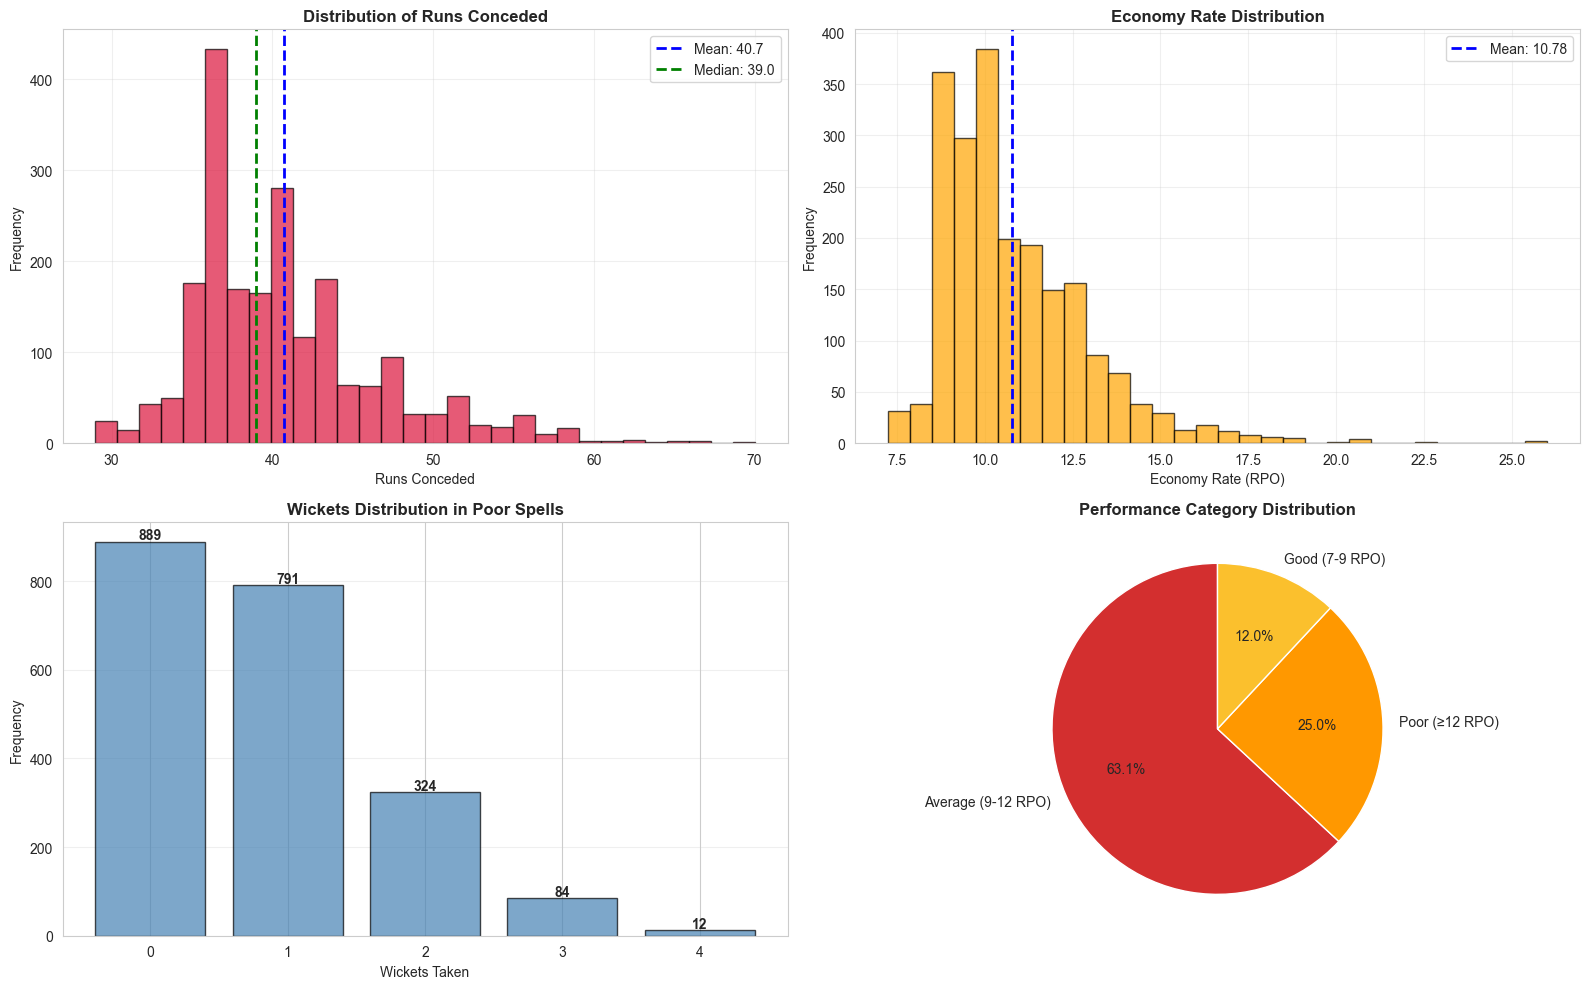

In [5]:
# Overall statistics
print("="*80)
print("KEY BOWLING STATISTICS (WORST PERFORMANCES)")
print("="*80)
print(f"Total Innings Analyzed: {len(df):,}")
print(f"Average Runs Conceded: {df['Runs'].mean():.2f}")
print(f"Average Economy Rate: {df['Economy_Rate'].mean():.2f} RPO")
print(f"Average Wickets Taken: {df['Wkts'].mean():.2f}")
print(f"Highest Runs Conceded: {df['Runs'].max()} runs")
print(f"Most Wickets in Bad Spell: {df['Wkts'].max()}")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Distribution of Runs Conceded
axes[0, 0].hist(df['Runs'], bins=30, color='crimson', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(df['Runs'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["Runs"].mean():.1f}')
axes[0, 0].axvline(df['Runs'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Runs"].median():.1f}')
axes[0, 0].set_title('Distribution of Runs Conceded', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Runs Conceded')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Economy Rate Distribution
axes[0, 1].hist(df['Economy_Rate'], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(df['Economy_Rate'].mean(), color='blue', linestyle='--', linewidth=2, label=f'Mean: {df["Economy_Rate"].mean():.2f}')
axes[0, 1].set_title('Economy Rate Distribution', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Economy Rate (RPO)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Wickets Distribution
wicket_counts = df['Wkts'].value_counts().sort_index()
axes[1, 0].bar(wicket_counts.index, wicket_counts.values, color='steelblue', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Wickets Distribution in Poor Spells', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Wickets Taken')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(wicket_counts.values):
    axes[1, 0].text(wicket_counts.index[i], v + 5, str(v), ha='center', fontweight='bold')

# 4. Performance Category Breakdown
perf_counts = df['Performance_Category'].value_counts()
colors = ['#d32f2f', '#ff9800', '#fbc02d', '#4caf50']
axes[1, 1].pie(perf_counts.values, labels=perf_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=colors)
axes[1, 1].set_title('Performance Category Distribution', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

## Player-wise Analysis: Most Expensive Bowlers

TOP 15 BOWLERS WITH MOST BAD SPELLS:


,Bad_Spells,Avg_Runs_Conceded,Max_Runs_Conceded,Total_Wkts,Avg_Economy,Total_Overs
Player,,,,,,
Dwayne Bravo,42,39.38,52,47,10.64,157.5
Umesh Yadav,37,41.51,65,24,10.58,145.5
Vinay Kumar,33,39.03,53,33,9.95,129.7
Praveen Kumar,32,38.91,51,22,10.18,123.4
Ishant Sharma,31,41.06,66,21,10.39,123.0
Amit Mishra,27,40.56,56,17,10.58,104.1
Bhuvneshwar Kumar,27,40.52,55,18,10.97,103.3
Sandeep Sharma,27,40.85,65,27,10.63,104.5
Lasith Malinga,27,40.96,58,23,10.24,108.0


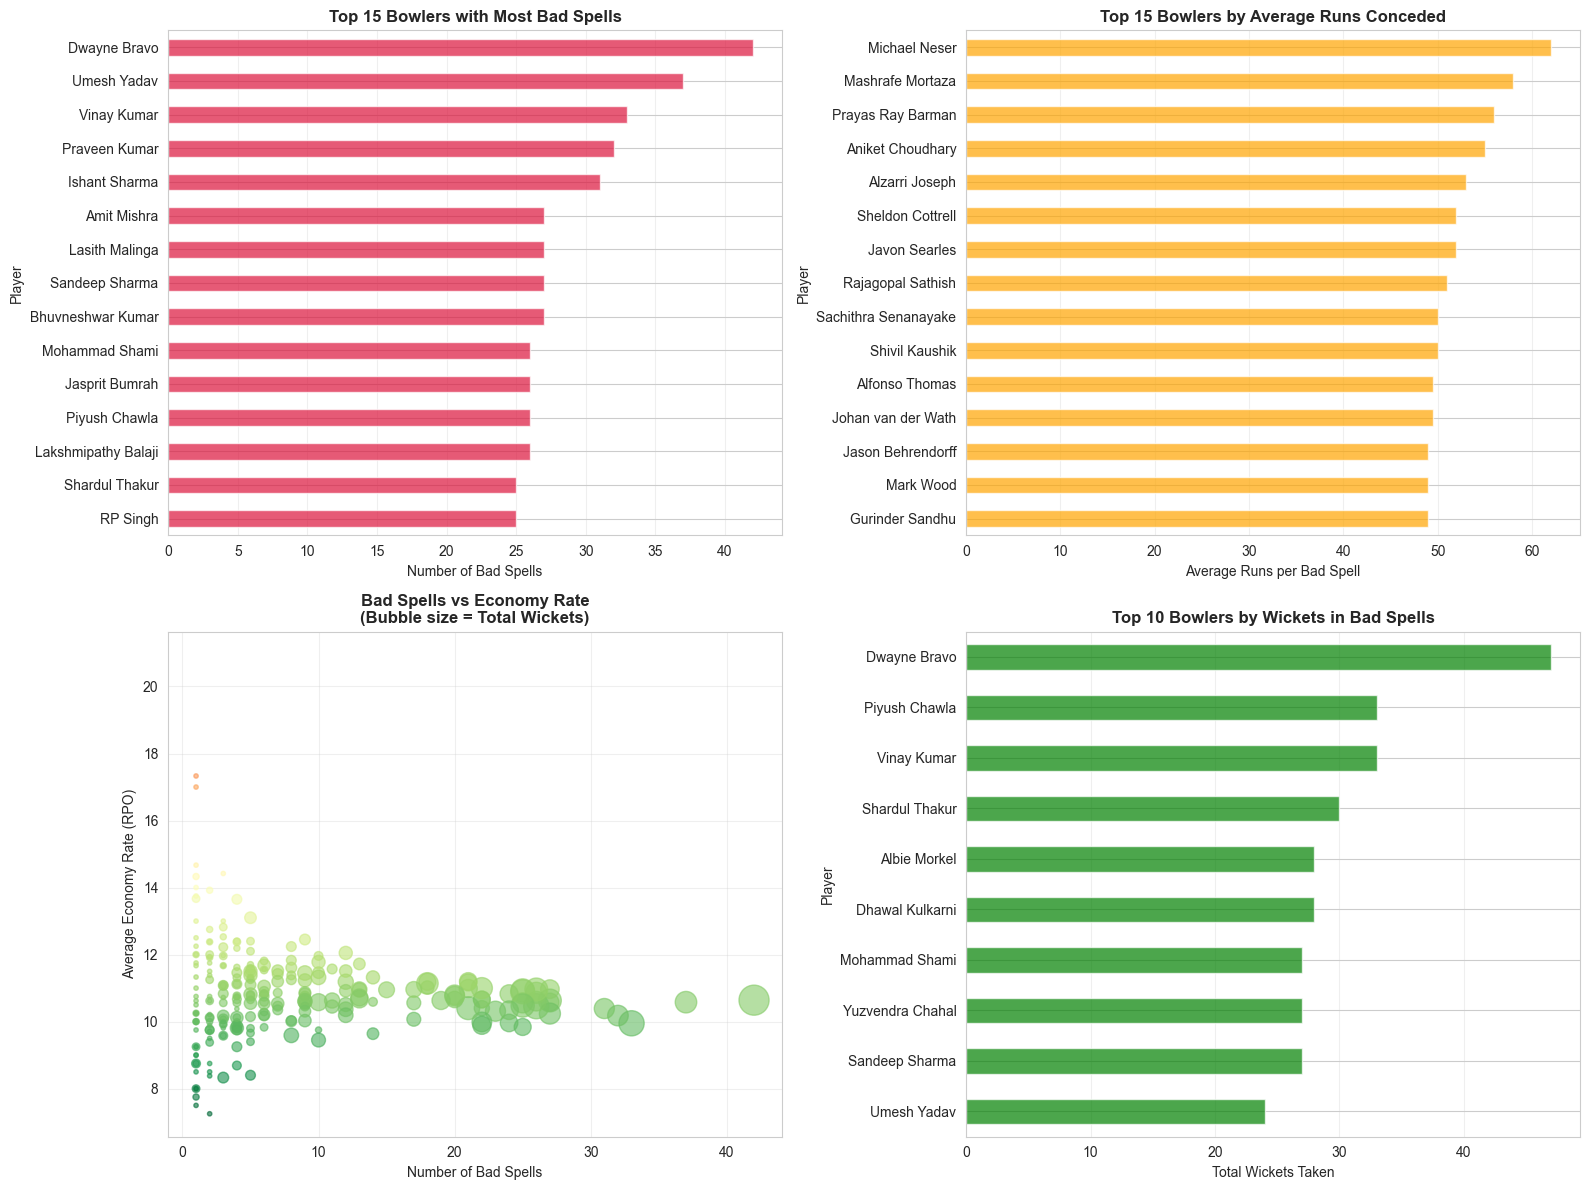

In [6]:
# Player-wise aggregation
player_stats = df.groupby('Player').agg({
    'Runs': ['count', 'mean', 'max'],
    'Wkts': 'sum',
    'Economy_Rate': 'mean',
    'Ov': 'sum'
}).round(2)

player_stats.columns = ['Bad_Spells', 'Avg_Runs_Conceded', 'Max_Runs_Conceded', 
                         'Total_Wkts', 'Avg_Economy', 'Total_Overs']
player_stats = player_stats.sort_values('Bad_Spells', ascending=False)

print("="*80)
print("TOP 15 BOWLERS WITH MOST BAD SPELLS:")
print("="*80)
display(player_stats.head(15))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top 15 bowlers by bad spells
top_15 = player_stats.head(15).sort_values('Bad_Spells', ascending=True)
top_15['Bad_Spells'].plot(kind='barh', ax=axes[0, 0], color='crimson', alpha=0.7)
axes[0, 0].set_title('Top 15 Bowlers with Most Bad Spells', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Number of Bad Spells')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Average runs conceded by top bowlers
top_15_by_avg = player_stats.nlargest(15, 'Avg_Runs_Conceded').sort_values('Avg_Runs_Conceded', ascending=True)
top_15_by_avg['Avg_Runs_Conceded'].plot(kind='barh', ax=axes[0, 1], color='orange', alpha=0.7)
axes[0, 1].set_title('Top 15 Bowlers by Average Runs Conceded', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Average Runs per Bad Spell')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Economy rate vs Bad spells (scatter)
axes[1, 0].scatter(player_stats['Bad_Spells'], player_stats['Avg_Economy'], 
                   s=player_stats['Total_Wkts']*10, alpha=0.6, c=player_stats['Avg_Economy'], 
                   cmap='RdYlGn_r')
axes[1, 0].set_title('Bad Spells vs Economy Rate\n(Bubble size = Total Wickets)', 
                     fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Number of Bad Spells')
axes[1, 0].set_ylabel('Average Economy Rate (RPO)')
axes[1, 0].grid(alpha=0.3)

# 4. Wickets taken despite bad spells
top_wkts = player_stats.nlargest(10, 'Total_Wkts').sort_values('Total_Wkts', ascending=True)
top_wkts['Total_Wkts'].plot(kind='barh', ax=axes[1, 1], color='green', alpha=0.7)
axes[1, 1].set_title('Top 10 Bowlers by Wickets in Bad Spells', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Total Wickets Taken')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Venue Analysis: Bowling Nightmares

TOP 15 VENUES WITH MOST BAD BOWLING SPELLS:


,Bad_Spells,Avg_Runs,Max_Runs,Avg_Economy,Avg_Wkts
Venue,,,,,
M. Chinnaswamy Stadium,233,41.84,70,11.33,0.82
Wankhede Stadium,230,42.09,63,11.06,0.90
Arun Jaitley Stadium,206,40.71,65,10.54,0.94
Eden Gardens,166,40.98,59,10.81,0.78
Chidambaram,159,40.38,63,11.01,0.80
IS Bindra Stadium,150,40.84,62,10.63,0.86
Rajiv Gandhi Intl. Cricket Stadium,132,40.84,66,11.10,0.74
Dubai International Stadium,100,41.41,57,10.96,0.68
Sawai Mansingh Stadium,87,40.11,55,10.51,0.71


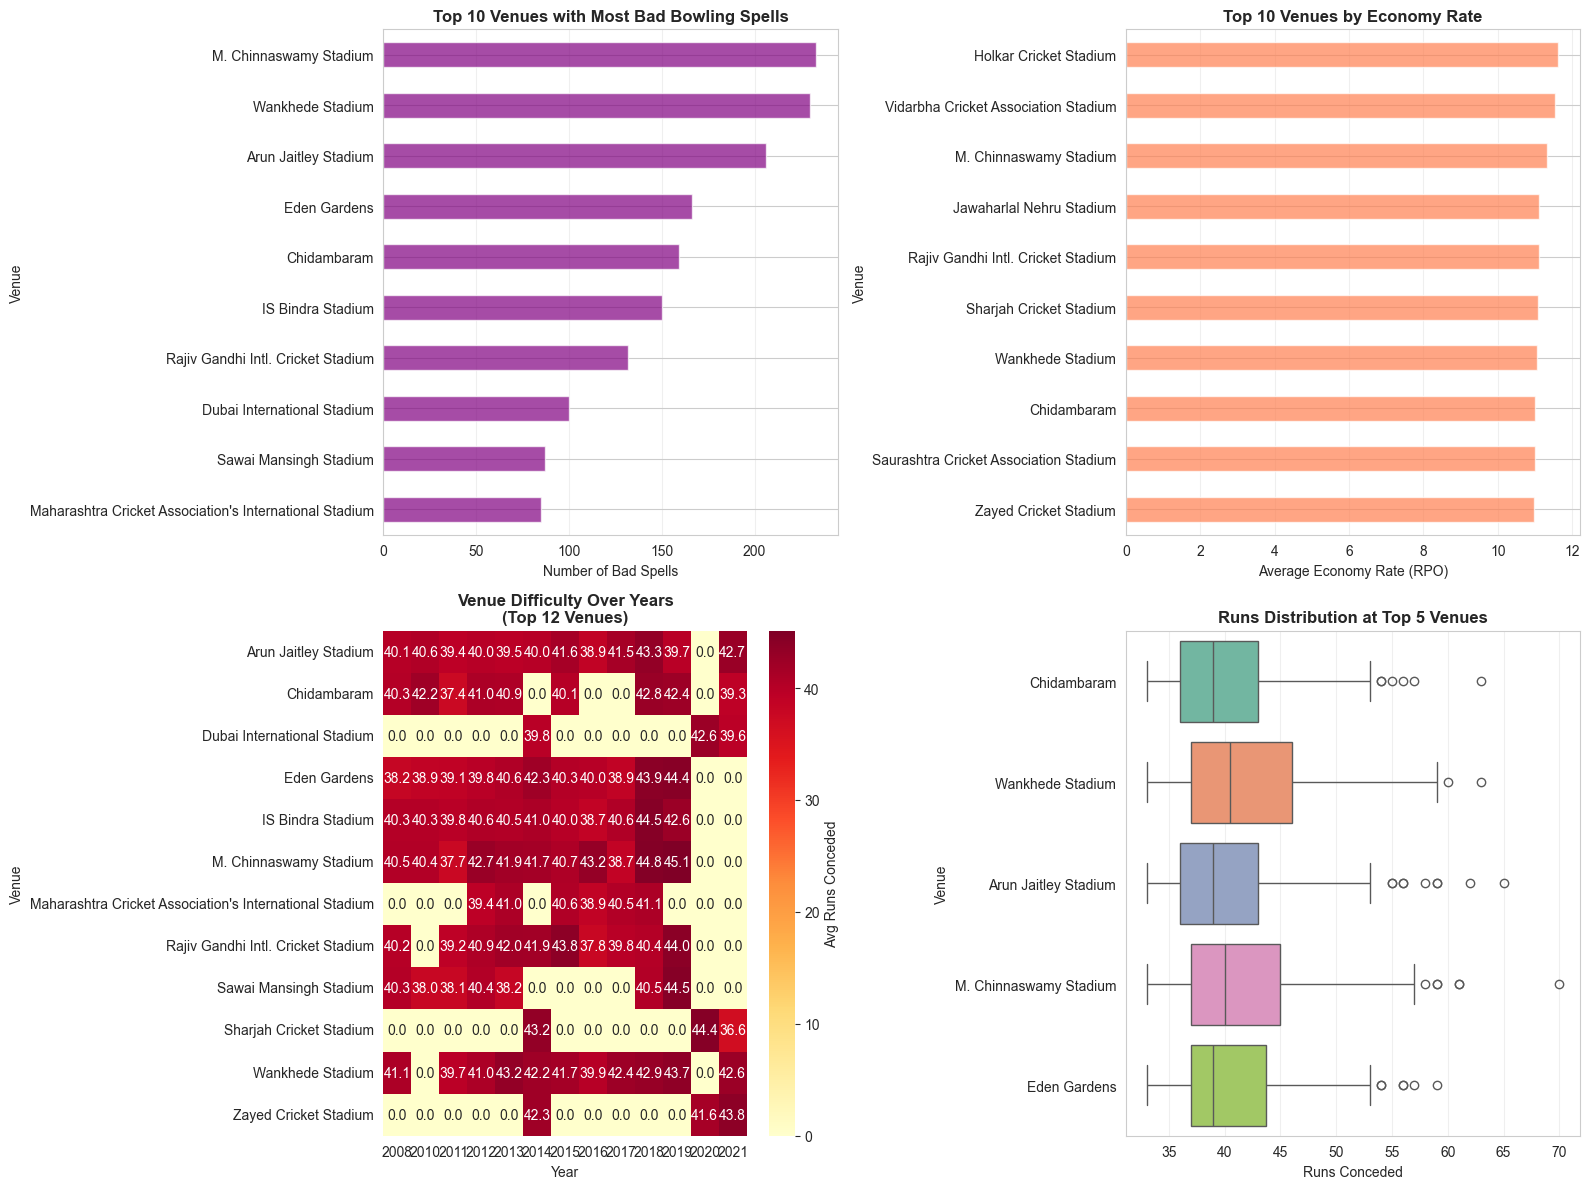

In [7]:
# Venue-wise analysis
venue_stats = df.groupby('Venue').agg({
    'Runs': ['count', 'mean', 'max'],
    'Economy_Rate': 'mean',
    'Wkts': 'mean'
}).round(2)

venue_stats.columns = ['Bad_Spells', 'Avg_Runs', 'Max_Runs', 'Avg_Economy', 'Avg_Wkts']
venue_stats = venue_stats.sort_values('Bad_Spells', ascending=False)

print("="*80)
print("TOP 15 VENUES WITH MOST BAD BOWLING SPELLS:")
print("="*80)
display(venue_stats.head(15))

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Top venues by bad spells
top_10_venues = venue_stats.head(10).sort_values('Bad_Spells', ascending=True)
top_10_venues['Bad_Spells'].plot(kind='barh', ax=axes[0, 0], color='purple', alpha=0.7)
axes[0, 0].set_title('Top 10 Venues with Most Bad Bowling Spells', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Number of Bad Spells')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Average economy by venue
top_eco_venues = venue_stats.nlargest(10, 'Avg_Economy').sort_values('Avg_Economy', ascending=True)
top_eco_venues['Avg_Economy'].plot(kind='barh', ax=axes[0, 1], color='coral', alpha=0.7)
axes[0, 1].set_title('Top 10 Venues by Economy Rate', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Average Economy Rate (RPO)')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Venue difficulty heatmap (top venues)
top_venues = venue_stats.head(12).index
venue_year_data = df[df['Venue'].isin(top_venues)].groupby(['Venue', 'Year'])['Runs'].mean().unstack(fill_value=0)
sns.heatmap(venue_year_data, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[1, 0], 
            cbar_kws={'label': 'Avg Runs Conceded'})
axes[1, 0].set_title('Venue Difficulty Over Years\n(Top 12 Venues)', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Venue')

# 4. Runs distribution by top venues
top_5_venues = venue_stats.head(5).index
venue_data_for_box = df[df['Venue'].isin(top_5_venues)]
sns.boxplot(data=venue_data_for_box, y='Venue', x='Runs', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Runs Distribution at Top 5 Venues', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Runs Conceded')
axes[1, 1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Team Analysis: Against Which Teams Bowlers Struggle

TEAMS THAT CAUSED MOST BAD BOWLING SPELLS:


,Bad_Spells_Faced,Avg_Runs_Scored,Max_Runs_Scored,Avg_Opp_Economy,Opp_Wickets_Lost
Against,,,,,
MI,297,41.51,64,10.82,282
RCB,272,41.02,70,11.07,203
CSK,258,40.97,66,10.94,208
PBKS,252,41.04,59,10.83,199
DC,234,40.15,58,10.56,201
KKR,230,40.24,61,10.65,206
RR,205,40.95,59,10.97,173
SRH,136,40.86,66,10.62,94
DEC,91,38.64,58,10.35,71


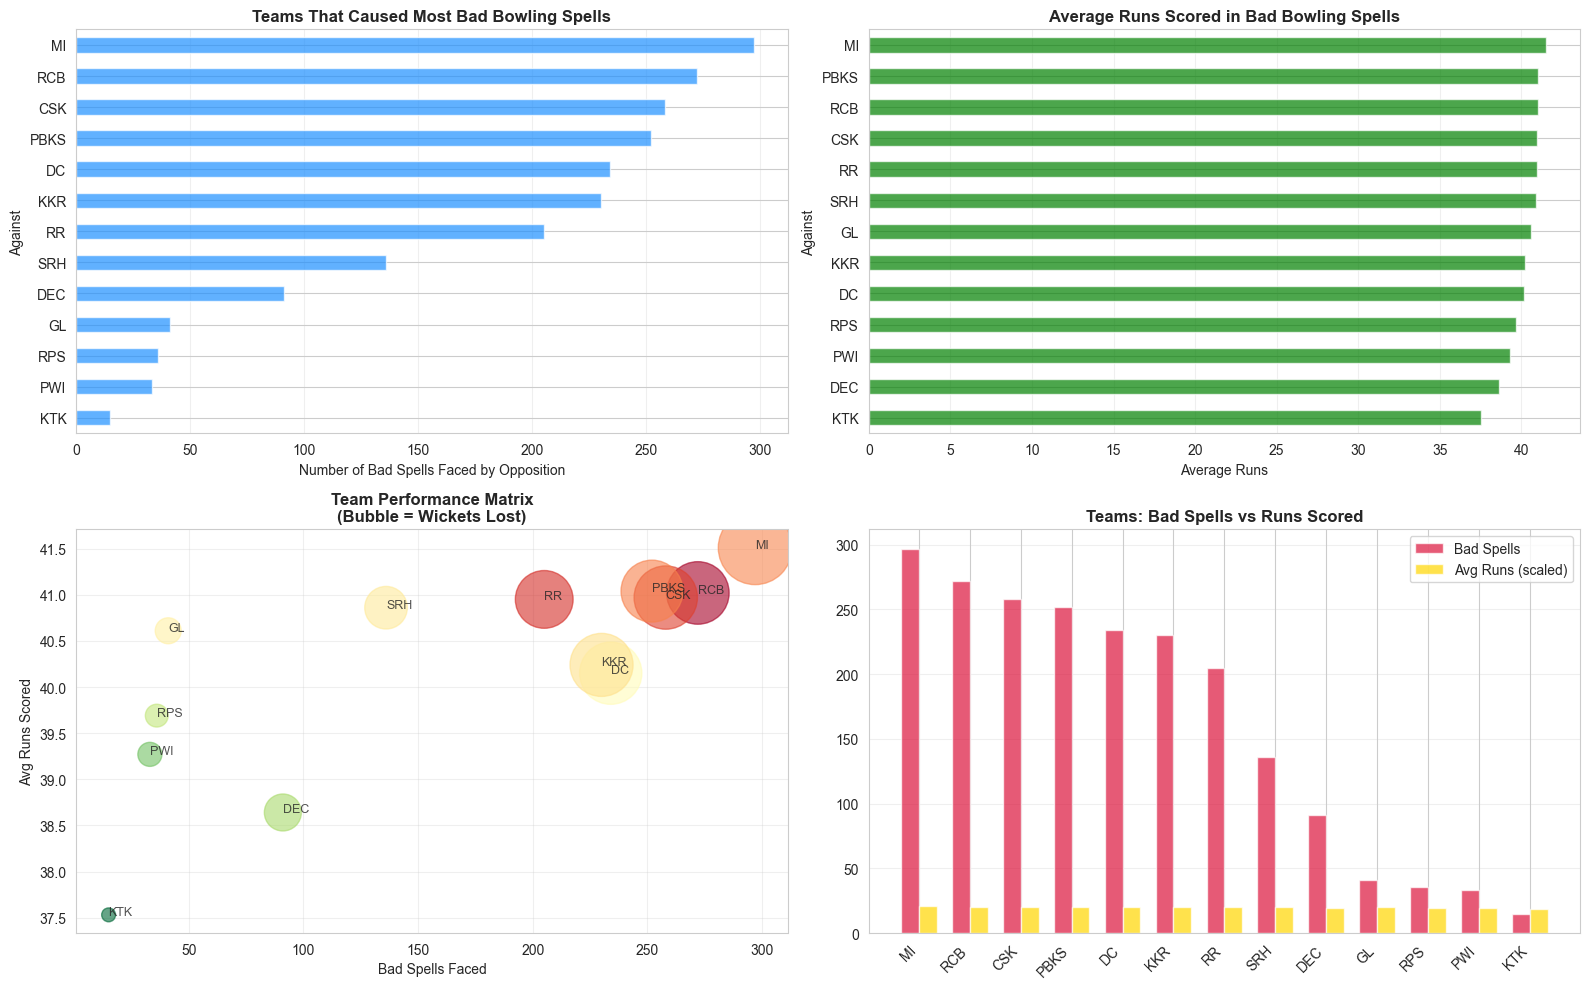

In [8]:
# Team-wise analysis
team_stats = df.groupby('Against').agg({
    'Runs': ['count', 'mean', 'max'],
    'Economy_Rate': 'mean',
    'Wkts': 'sum'
}).round(2)

team_stats.columns = ['Bad_Spells_Faced', 'Avg_Runs_Scored', 'Max_Runs_Scored', 
                       'Avg_Opp_Economy', 'Opp_Wickets_Lost']
team_stats = team_stats.sort_values('Bad_Spells_Faced', ascending=False)

print("="*80)
print("TEAMS THAT CAUSED MOST BAD BOWLING SPELLS:")
print("="*80)
display(team_stats)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Teams causing most bad spells
team_stats.sort_values('Bad_Spells_Faced', ascending=True).plot(
    y='Bad_Spells_Faced', kind='barh', ax=axes[0, 0], color='dodgerblue', alpha=0.7, legend=False
)
axes[0, 0].set_title('Teams That Caused Most Bad Bowling Spells', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Number of Bad Spells Faced by Opposition')
axes[0, 0].grid(axis='x', alpha=0.3)

# 2. Average runs scored against bowlers
team_stats.sort_values('Avg_Runs_Scored', ascending=True).plot(
    y='Avg_Runs_Scored', kind='barh', ax=axes[0, 1], color='green', alpha=0.7, legend=False
)
axes[0, 1].set_title('Average Runs Scored in Bad Bowling Spells', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Average Runs')
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Team performance matrix
axes[1, 0].scatter(team_stats['Bad_Spells_Faced'], team_stats['Avg_Runs_Scored'], 
                   s=team_stats['Opp_Wickets_Lost']*10, alpha=0.6, 
                   c=team_stats['Avg_Opp_Economy'], cmap='RdYlGn_r')
axes[1, 0].set_title('Team Performance Matrix\n(Bubble = Wickets Lost)', 
                     fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Bad Spells Faced')
axes[1, 0].set_ylabel('Avg Runs Scored')
for team in team_stats.index:
    axes[1, 0].annotate(team, 
                        (team_stats.loc[team, 'Bad_Spells_Faced'], 
                         team_stats.loc[team, 'Avg_Runs_Scored']),
                        fontsize=9, alpha=0.8)
axes[1, 0].grid(alpha=0.3)

# 4. Comparative bar chart
x = np.arange(len(team_stats))
width = 0.35
axes[1, 1].bar(x - width/2, team_stats['Bad_Spells_Faced'], width, 
               label='Bad Spells', color='crimson', alpha=0.7)
axes[1, 1].bar(x + width/2, team_stats['Avg_Runs_Scored']/2, width, 
               label='Avg Runs (scaled)', color='gold', alpha=0.7)
axes[1, 1].set_title('Teams: Bad Spells vs Runs Scored', fontweight='bold', fontsize=12)
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(team_stats.index, rotation=45, ha='right')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Year-wise Trends: Evolution of Bad Bowling Spells

YEAR-WISE BOWLING TRENDS:


,Bad_Spells,Avg_Runs,Max_Runs,Avg_Economy,Avg_Wkts
Year,,,,,
2008,150,40.23,59,10.76,0.82
2009,150,35.35,58,9.44,0.94
2010,150,40.57,56,10.90,0.81
2011,150,38.79,59,10.30,0.86
2012,150,40.93,63,10.89,0.70
2013,150,40.74,66,10.53,0.78
2014,150,41.17,65,11.07,0.87
2015,150,40.79,59,10.85,0.77
2016,150,40.25,61,10.63,0.79


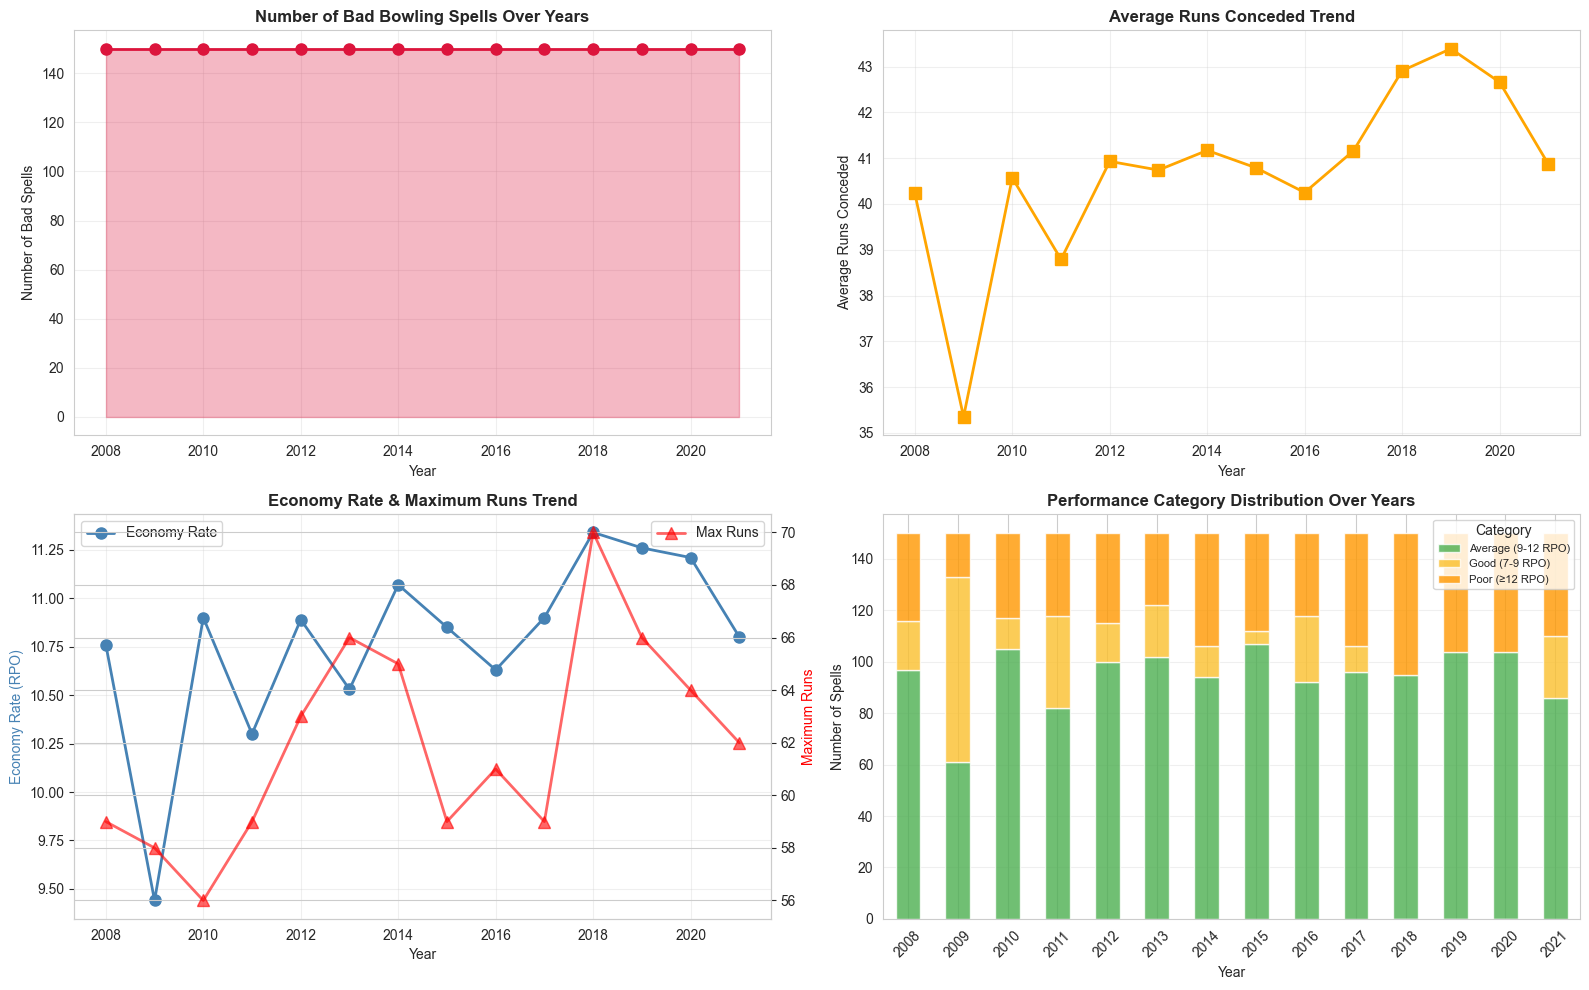

In [9]:
# Year-wise trends
year_stats = df.groupby('Year').agg({
    'Runs': ['count', 'mean', 'max'],
    'Economy_Rate': 'mean',
    'Wkts': 'mean'
}).round(2)

year_stats.columns = ['Bad_Spells', 'Avg_Runs', 'Max_Runs', 'Avg_Economy', 'Avg_Wkts']

print("="*80)
print("YEAR-WISE BOWLING TRENDS:")
print("="*80)
display(year_stats)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Bad spells over years
axes[0, 0].plot(year_stats.index, year_stats['Bad_Spells'], marker='o', 
                linewidth=2, markersize=8, color='crimson')
axes[0, 0].fill_between(year_stats.index, year_stats['Bad_Spells'], alpha=0.3, color='crimson')
axes[0, 0].set_title('Number of Bad Bowling Spells Over Years', fontweight='bold', fontsize=12)
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Number of Bad Spells')
axes[0, 0].grid(alpha=0.3)

# 2. Average runs conceded trend
axes[0, 1].plot(year_stats.index, year_stats['Avg_Runs'], marker='s', 
                linewidth=2, markersize=8, color='orange')
axes[0, 1].set_title('Average Runs Conceded Trend', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Runs Conceded')
axes[0, 1].grid(alpha=0.3)

# 3. Economy rate trend
ax_twin = axes[1, 0].twinx()
axes[1, 0].plot(year_stats.index, year_stats['Avg_Economy'], marker='o', 
                linewidth=2, markersize=8, color='steelblue', label='Economy Rate')
ax_twin.plot(year_stats.index, year_stats['Max_Runs'], marker='^', 
             linewidth=2, markersize=8, color='red', alpha=0.6, label='Max Runs')
axes[1, 0].set_title('Economy Rate & Maximum Runs Trend', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Economy Rate (RPO)', color='steelblue')
ax_twin.set_ylabel('Maximum Runs', color='red')
axes[1, 0].grid(alpha=0.3)
axes[1, 0].legend(loc='upper left')
ax_twin.legend(loc='upper right')

# 4. Year-wise distribution (stacked bar)
year_perf = df.groupby(['Year', 'Performance_Category']).size().unstack(fill_value=0)
year_perf.plot(kind='bar', stacked=True, ax=axes[1, 1], 
               color=['#4caf50', '#fbc02d', '#ff9800', '#d32f2f'], alpha=0.8)
axes[1, 1].set_title('Performance Category Distribution Over Years', 
                     fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Spells')
axes[1, 1].legend(title='Category', fontsize=8)
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Comprehensive Heatmaps & Correlation Analysis

Correlation Matrix:


,Runs,Wkts,Ov,Economy_Rate,Wickets_Per_Over,Runs_Per_Wicket
Runs,1.000000,-0.078220,0.094648,0.671220,-0.083560,0.555781
Wkts,-0.078220,1.000000,0.220776,-0.213469,0.994134,-0.740460
Ov,0.094648,0.220776,1.000000,-0.653073,0.166466,-0.071881
Economy_Rate,0.671220,-0.213469,-0.653073,1.000000,-0.182595,0.458475
Wickets_Per_Over,-0.083560,0.994134,0.166466,-0.182595,1.000000,-0.734560
Runs_Per_Wicket,0.555781,-0.740460,-0.071881,0.458475,-0.734560,1.000000


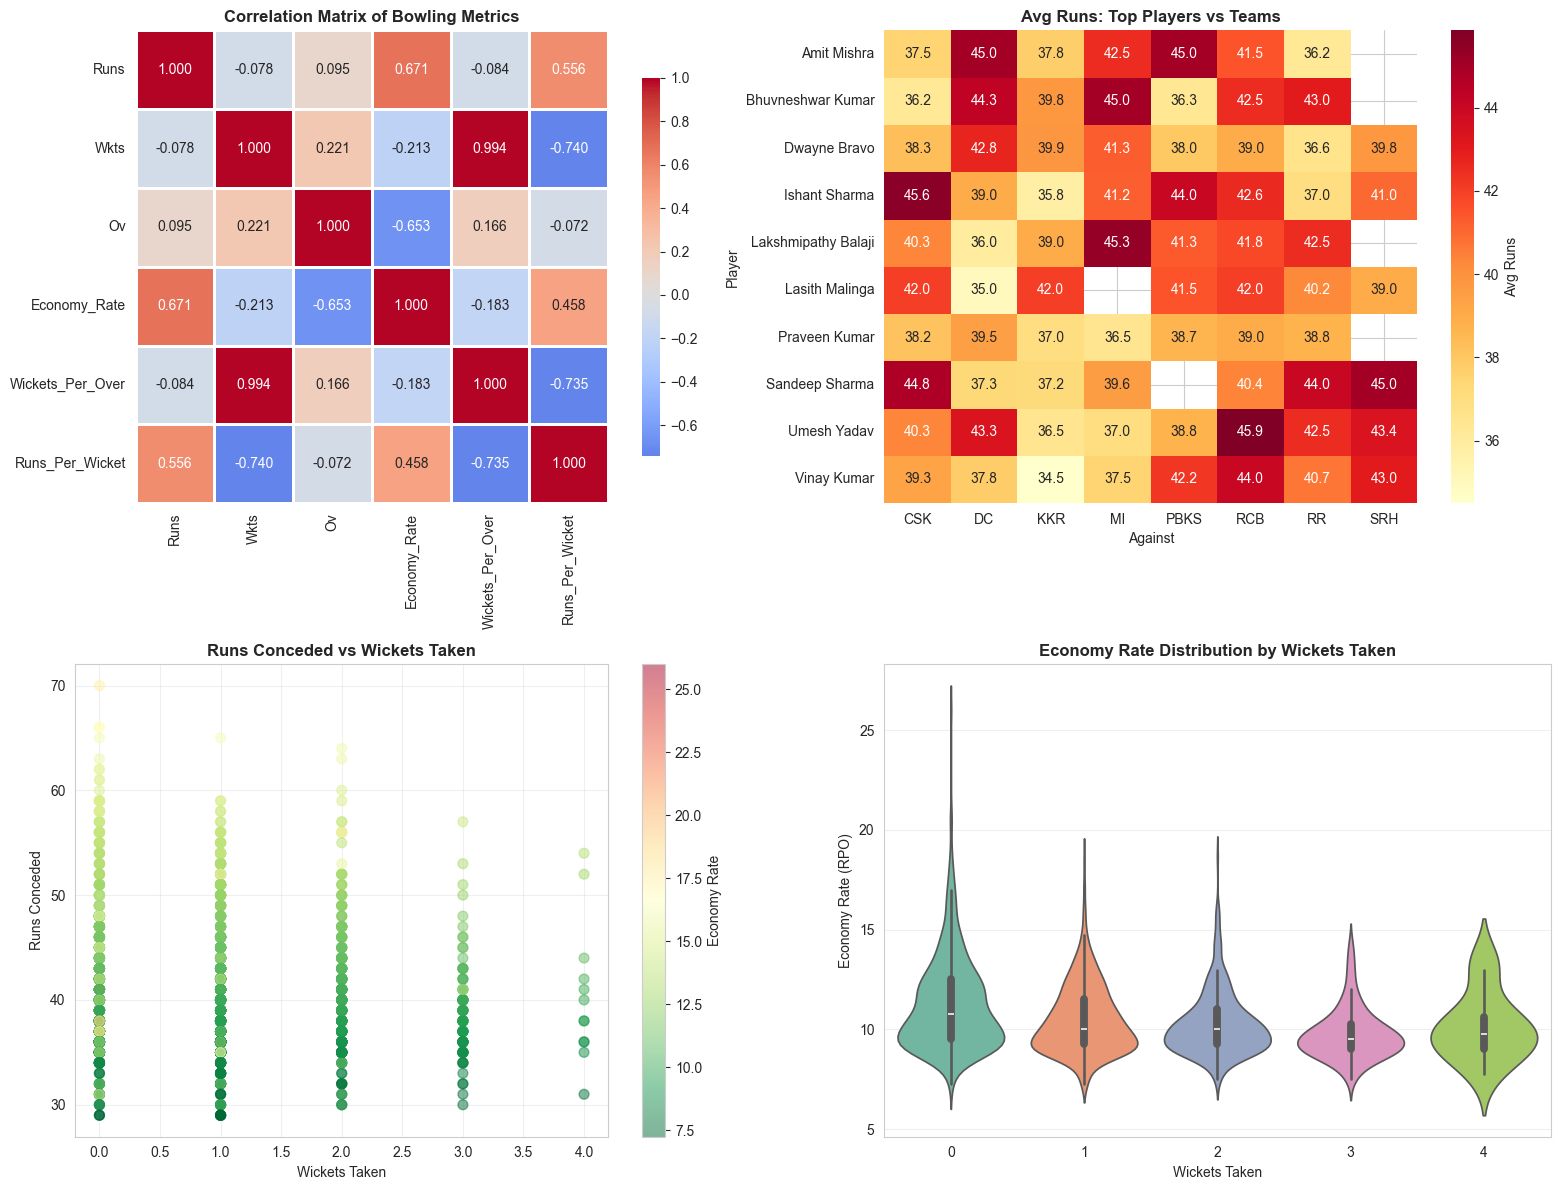

In [10]:
# Correlation analysis
numeric_cols = ['Runs', 'Wkts', 'Ov', 'Economy_Rate', 'Wickets_Per_Over', 'Runs_Per_Wicket']
correlation_matrix = df[numeric_cols].corr()

print("Correlation Matrix:")
display(correlation_matrix)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Correlation heatmap
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, ax=axes[0, 0], cbar_kws={"shrink": 0.8})
axes[0, 0].set_title('Correlation Matrix of Bowling Metrics', fontweight='bold', fontsize=12)

# 2. Player-Team heatmap (top players vs top teams)
top_players = df['Player'].value_counts().head(10).index
top_teams = df['Against'].value_counts().head(8).index
player_team_pivot = df[df['Player'].isin(top_players) & df['Against'].isin(top_teams)].pivot_table(
    values='Runs', index='Player', columns='Against', aggfunc='mean'
)
sns.heatmap(player_team_pivot, annot=True, fmt='.1f', cmap='YlOrRd', ax=axes[0, 1], 
            cbar_kws={'label': 'Avg Runs'})
axes[0, 1].set_title('Avg Runs: Top Players vs Teams', fontweight='bold', fontsize=12)

# 3. Runs vs Wickets relationship
axes[1, 0].scatter(df['Wkts'], df['Runs'], alpha=0.5, c=df['Economy_Rate'], 
                   cmap='RdYlGn_r', s=50)
axes[1, 0].set_title('Runs Conceded vs Wickets Taken', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Wickets Taken')
axes[1, 0].set_ylabel('Runs Conceded')
axes[1, 0].grid(alpha=0.3)
cbar = plt.colorbar(axes[1, 0].collections[0], ax=axes[1, 0])
cbar.set_label('Economy Rate')

# 4. Economy distribution by wickets
sns.violinplot(data=df, x='Wkts', y='Economy_Rate', palette='Set2', ax=axes[1, 1])
axes[1, 1].set_title('Economy Rate Distribution by Wickets Taken', 
                     fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Wickets Taken')
axes[1, 1].set_ylabel('Economy Rate (RPO)')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Key Insights & Summary

IPL BOWLING ANALYSIS - KEY INSIGHTS (WORST PERFORMANCES)

🔴 WORST BOWLING SPELL:
   Player: Basil Thampi
   Runs Conceded: 70
   Wickets: 0
   Overs: 4.0
   Economy: 17.50
   Against: RCB at M. Chinnaswamy Stadium
   Date: 17 May 2018

📉 MOST BAD SPELLS:
   Player: Dwayne Bravo
   Bad Spells: 42
   Avg Runs Conceded: 39.38
   Avg Economy: 10.64

🏟️ TOUGHEST VENUE FOR BOWLERS:
   Venue: M. Chinnaswamy Stadium
   Bad Spells: 233
   Avg Runs: 41.84
   Avg Economy: 11.33

⚡ MOST DESTRUCTIVE BATTING TEAM:
   Team: MI
   Caused Bad Spells: 297
   Avg Runs Scored: 41.51

📅 YEAR-WISE TRENDS:
   Worst Year for Bowlers: 2019
   Avg Runs Conceded: 43.39
   Avg Economy: 11.26

🎯 TOP WICKET-TAKERS (Despite Bad Spells):
   1. Dwayne Bravo: 47 wickets in 42 bad spells
   2. Vinay Kumar: 33 wickets in 33 bad spells
   3. Piyush Chawla: 33 wickets in 26 bad spells
   4. Shardul Thakur: 30 wickets in 25 bad spells
   5. Dhawal Kulkarni: 28 wickets in 25 bad spells


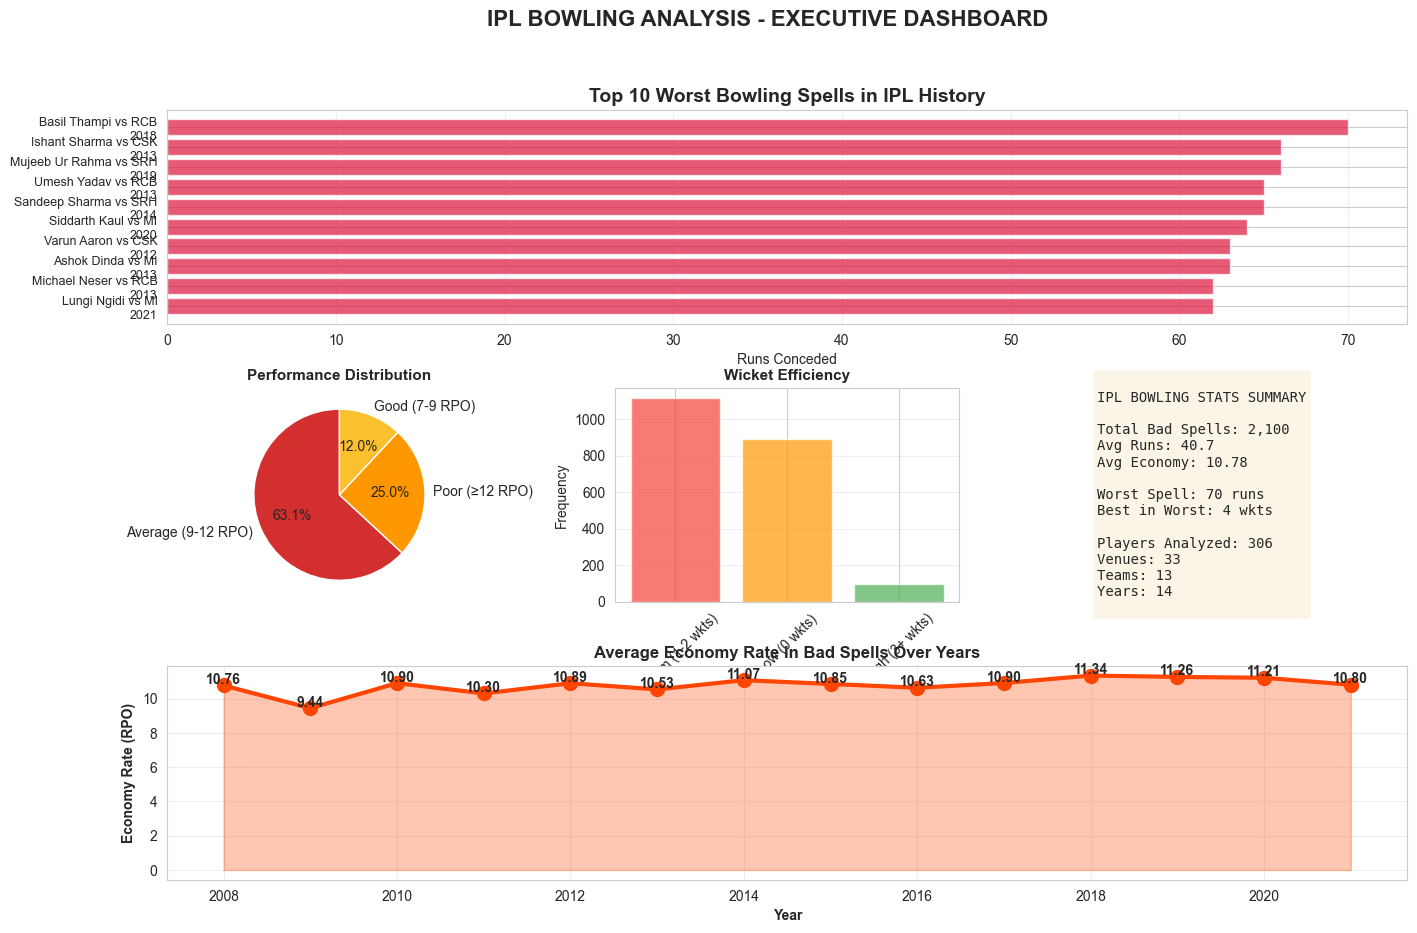


ANALYSIS COMPLETE!


In [11]:
# Generate comprehensive insights
print("="*100)
print("IPL BOWLING ANALYSIS - KEY INSIGHTS (WORST PERFORMANCES)")
print("="*100)

# 1. Worst individual spell
worst_spell = df.loc[df['Runs'].idxmax()]
print(f"\n🔴 WORST BOWLING SPELL:")
print(f"   Player: {worst_spell['Player']}")
print(f"   Runs Conceded: {worst_spell['Runs']}")
print(f"   Wickets: {worst_spell['Wkts']}")
print(f"   Overs: {worst_spell['Ov']}")
print(f"   Economy: {worst_spell['Economy_Rate']:.2f}")
print(f"   Against: {worst_spell['Against']} at {worst_spell['Venue']}")
print(f"   Date: {worst_spell['Match Date'].strftime('%d %B %Y')}")

# 2. Most consistent poor performer
print(f"\n📉 MOST BAD SPELLS:")
top_poor = player_stats.iloc[0]
print(f"   Player: {player_stats.index[0]}")
print(f"   Bad Spells: {int(top_poor['Bad_Spells'])}")
print(f"   Avg Runs Conceded: {top_poor['Avg_Runs_Conceded']:.2f}")
print(f"   Avg Economy: {top_poor['Avg_Economy']:.2f}")

# 3. Toughest venue
print(f"\n🏟️ TOUGHEST VENUE FOR BOWLERS:")
worst_venue = venue_stats.iloc[0]
print(f"   Venue: {venue_stats.index[0]}")
print(f"   Bad Spells: {int(worst_venue['Bad_Spells'])}")
print(f"   Avg Runs: {worst_venue['Avg_Runs']:.2f}")
print(f"   Avg Economy: {worst_venue['Avg_Economy']:.2f}")

# 4. Most destructive team
print(f"\n⚡ MOST DESTRUCTIVE BATTING TEAM:")
best_batting = team_stats.iloc[0]
print(f"   Team: {team_stats.index[0]}")
print(f"   Caused Bad Spells: {int(best_batting['Bad_Spells_Faced'])}")
print(f"   Avg Runs Scored: {best_batting['Avg_Runs_Scored']:.2f}")

# 5. Year-wise insights
print(f"\n📅 YEAR-WISE TRENDS:")
worst_year = year_stats.loc[year_stats['Avg_Runs'].idxmax()]
print(f"   Worst Year for Bowlers: {year_stats['Avg_Runs'].idxmax()}")
print(f"   Avg Runs Conceded: {worst_year['Avg_Runs']:.2f}")
print(f"   Avg Economy: {worst_year['Avg_Economy']:.2f}")

# 6. Wicket-taking despite being expensive
wicket_takers = player_stats.nlargest(5, 'Total_Wkts')
print(f"\n🎯 TOP WICKET-TAKERS (Despite Bad Spells):")
for i, (player, stats) in enumerate(wicket_takers.iterrows(), 1):
    print(f"   {i}. {player}: {int(stats['Total_Wkts'])} wickets in {int(stats['Bad_Spells'])} bad spells")

# Summary visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Top 10 worst spells
ax1 = fig.add_subplot(gs[0, :])
top_10_worst = df.nlargest(10, 'Runs')[['Player', 'Runs', 'Against', 'Venue', 'Match Date']]
top_10_worst['Label'] = (top_10_worst['Player'].str[:15] + ' vs ' + 
                          top_10_worst['Against'] + '\n' + 
                          top_10_worst['Match Date'].dt.strftime('%Y'))
ax1.barh(range(10), top_10_worst['Runs'].values, color='crimson', alpha=0.7)
ax1.set_yticks(range(10))
ax1.set_yticklabels(top_10_worst['Label'].values, fontsize=9)
ax1.set_title('Top 10 Worst Bowling Spells in IPL History', fontsize=14, fontweight='bold')
ax1.set_xlabel('Runs Conceded')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# 2. Performance distribution pie
ax2 = fig.add_subplot(gs[1, 0])
perf_dist = df['Performance_Category'].value_counts()
colors = ['#d32f2f', '#ff9800', '#fbc02d', '#4caf50']
ax2.pie(perf_dist.values, labels=perf_dist.index, autopct='%1.1f%%', 
        startangle=90, colors=colors)
ax2.set_title('Performance Distribution', fontweight='bold', fontsize=11)

# 3. Wicket efficiency
ax3 = fig.add_subplot(gs[1, 1])
wkt_dist = df['Wicket_Efficiency'].value_counts()
ax3.bar(wkt_dist.index, wkt_dist.values, color=['#f44336', '#ff9800', '#4caf50'], alpha=0.7)
ax3.set_title('Wicket Efficiency', fontweight='bold', fontsize=11)
ax3.set_ylabel('Frequency')
ax3.tick_params(axis='x', rotation=45)
ax3.grid(axis='y', alpha=0.3)

# 4. Summary stats panel
ax4 = fig.add_subplot(gs[1, 2])
ax4.axis('off')
summary_text = f"""
IPL BOWLING STATS SUMMARY

Total Bad Spells: {len(df):,}
Avg Runs: {df['Runs'].mean():.1f}
Avg Economy: {df['Economy_Rate'].mean():.2f}

Worst Spell: {df['Runs'].max()} runs
Best in Worst: {df['Wkts'].max()} wkts

Players Analyzed: {df['Player'].nunique()}
Venues: {df['Venue'].nunique()}
Teams: {df['Against'].nunique()}
Years: {df['Year'].nunique()}
"""
ax4.text(0.1, 0.5, summary_text, fontsize=10, family='monospace', 
         verticalalignment='center', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

# 5. Economy trend
ax5 = fig.add_subplot(gs[2, :])
year_eco = df.groupby('Year')['Economy_Rate'].mean()
ax5.plot(year_eco.index, year_eco.values, marker='o', linewidth=3, markersize=10, color='orangered')
ax5.fill_between(year_eco.index, year_eco.values, alpha=0.3, color='orangered')
ax5.set_title('Average Economy Rate in Bad Spells Over Years', fontsize=12, fontweight='bold')
ax5.set_xlabel('Year', fontweight='bold')
ax5.set_ylabel('Economy Rate (RPO)', fontweight='bold')
ax5.grid(alpha=0.3)
for year, eco in zip(year_eco.index, year_eco.values):
    ax5.text(year, eco + 0.1, f'{eco:.2f}', ha='center', fontweight='bold')

plt.suptitle('IPL BOWLING ANALYSIS - EXECUTIVE DASHBOARD', fontsize=16, fontweight='bold', y=0.98)
plt.show()

print("\n" + "="*100)
print("ANALYSIS COMPLETE!")
print("="*100)